In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv('D:\MachineLearning-LearnByPractice\placement_project_logistic_regression\placement.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_17456\1107366039.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\MachineLearning-LearnByPractice\placement_project_logistic_regression\placement.csv')


In [43]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [45]:
df.shape

(100, 4)

In [46]:
df = df.iloc[:,1:]#removes the first column from your DataFrame df.

In [47]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [48]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [49]:
import matplotlib.pyplot as plt


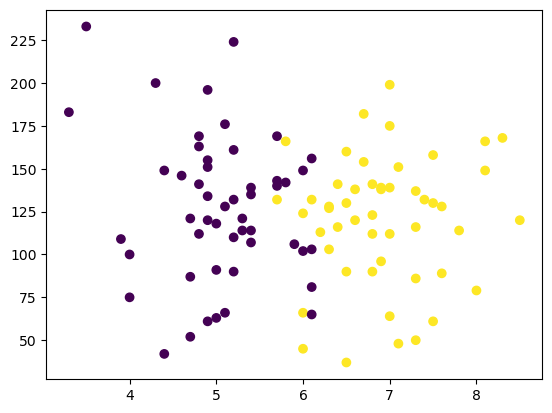

In [50]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [51]:
X = df.iloc[:, 0:2]  # Selects the first two columns as features (cgpa and iq)
y = df.iloc[:, -1]   # Selects the last column as the target (placement)

In [52]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [53]:
y.shape

(100,)

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [55]:
X_train

,cgpa,iq
11,6.9,138.0
98,6.3,103.0
43,6.8,141.0
26,7.0,199.0
17,3.3,183.0
...,...,...
38,6.5,160.0
56,6.1,65.0
27,6.0,124.0
86,5.1,128.0


In [56]:
y_train

11    1
98    1
43    1
26    1
17    0
     ..
38    1
56    0
27    1
86    0
34    0
Name: placement, Length: 90, dtype: int64

In [57]:
X_test

,cgpa,iq
42,7.6,89.0
4,5.8,142.0
35,6.8,90.0
50,3.5,233.0
96,4.4,42.0
52,7.0,175.0
10,6.0,45.0
3,7.4,132.0
51,4.8,141.0
8,6.1,156.0


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)

In [61]:
X_train

array([[ 0.80607295,  0.38747369],
       [ 0.27067394, -0.54637645],
       [ 0.71683978,  0.46751799],
       [ 0.89530612,  2.01504108],
       [-2.4063211 ,  1.58813816],
       [ 0.53837345, -0.09279209],
       [-1.78168892, -1.29345656],
       [-0.88935724, -0.86655364],
       [-0.80012407, -1.53358945],
       [ 0.00297444, -0.57305788],
       [ 0.89530612,  0.41415513],
       [-0.71089091, -0.89323507],
       [ 1.16300562, -1.96049237],
       [-0.26472507,  0.2273851 ],
       [ 0.98453929, -2.01385524],
       [ 0.53837345,  0.38747369],
       [ 0.44914028, -0.89323507],
       [ 1.16300562,  0.36079226],
       [ 0.35990711, -0.19951782],
       [ 0.44914028,  0.17402223],
       [ 1.43070513,  0.12065937],
       [-0.62165774, -0.06611066],
       [-0.80012407,  1.40136813],
       [-0.53242457, -0.25288069],
       [-0.88935724, -0.14615496],
       [ 0.80607295, -0.73314648],
       [-0.97859041,  0.73433232],
       [-1.51398942,  2.04172251],
       [-0.97859041,

In [62]:
X_test = scaler.transform(X_test)

In [63]:
X_test

array([[ 1.43070513, -0.9199165 ],
       [-0.1754919 ,  0.49419942],
       [ 0.71683978, -0.89323507],
       [-2.22785476,  2.92220979],
       [-1.42475625, -2.17394383],
       [ 0.89530612,  1.3746867 ],
       [ 0.00297444, -2.09389954],
       [ 1.25223879,  0.2273851 ],
       [-1.06782358,  0.46751799],
       [ 0.09220761,  0.86773948]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [66]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred = clf.predict(X_test)

In [68]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [69]:
y_test

42    1
4     0
35    1
50    0
96    0
52    1
10    1
3     1
51    0
8     0
Name: placement, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.8

In [72]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

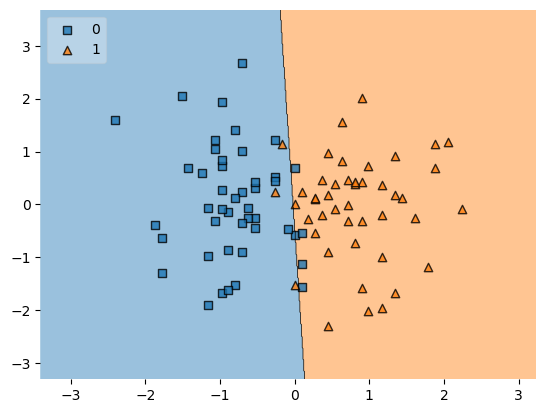

In [73]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [74]:
import pickle

In [75]:
pickle.dump(clf,open('model.pkl','wb'))

In [76]:

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [77]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
